<a href="https://colab.research.google.com/github/Ananya2306/IBM_TRAINING_Deep_Learning/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Activation Function

loss fuction

rnn - small dataset

lstm -  large dataset

cnn - img



DL - features learned auto / many hidden layers
Ml - feature  engineering is often manual

Layer in NN

input - raw data

hidden - perform computations & feature extraction

output - produces final prediction


ACTIVATION FUNCTION - non linearity
relu - fast training/ most common
sigmoid - binary classification
tanh - centered output
softmax - multi class classification

needed - the network behaves like a simple linear model

loss fun - how wrong the model is

task
regression
binary clas
multi class

lower loss = better model

mse
bse
cce

optimizers - update model weights to minimize loss

-
sgd - basic gradient descent
adam  - fast , adaptive , industry fav
emsprop - handles varying learning rates

frameworks :-
tensorflow - developed by google , used in ptod sys, highly scalable
keras - hgh level api , easy for beginners, built on tensorflow
pytorch - preferred in research , dynamic somputation graph , widely used in startups & academia

IBM supports Tensorflow , Keras , Pytorch on WATSON STUDIO



hANDS oN : BUILD A SIMPLE NEURAL NETWORK

OBJECTIVE - Binary classification example

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


sample dataset

In [2]:
X = np.array([
    [2,40],
    [3,40],
    [1,12],
    [4,28],
    [12,25],
    [14,28]
])
y = np.array([0,0,0,1,1,1])

split dataset

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Feature Scaling

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Build a Neural Model

In [14]:
model = Sequential()
#hidden layer
model.add(Dense(units=4, input_dim=2, activation='relu'))
#output layer
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile

In [15]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

In [17]:
history = model.fit(X_train, y_train, epochs=50,batch_size=1,verbose=1)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4667 - loss: 4.6607
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.1667 - loss: 7.2960      
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.1000 - loss: 6.4425
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.1667 - loss: 5.3316     
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1667 - loss: 5.5227     
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4667 - loss: 3.6997
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2667 - loss: 5.1692    
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2667 - loss: 3.9664     
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4667 - loss: 2.5118
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4667 - loss: 2.3201 
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1667 - loss: 4.4589     
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - ac

Evaluate Model

In [18]:
loss, accuracy = model.evaluate(X_test, y_test)
print("\n Test Accuracy: ",accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 1.0000 - loss: 0.5994

 Test Accuracy:  1.0


make prediction

In [21]:
new_student = np.array([[6,75]])
new_student_scaled = scaler.transform(new_student)

prediction = model.predict(new_student_scaled)
print("\n Prediction: ",prediction[0][0])

if prediction[0][0] > 0.5:
  print("Student will be admitted")
else:
  print("Student will not be admitted")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step

 Prediction:  0.40952417
Student will not be admitted


PLOT TRANING ACCURACY

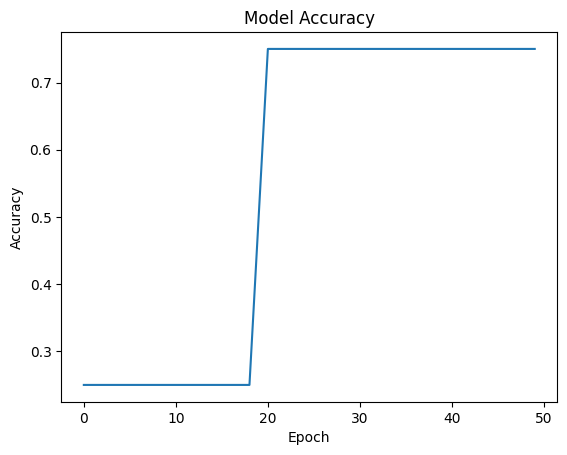

In [22]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

PLOT TRAINING LOSS

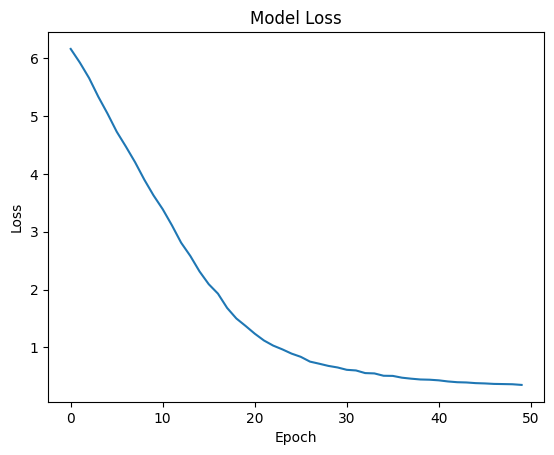

In [23]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

show model summary

In [24]:
print("Model Summary")
model.summary()

Model Summary


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53 (216.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 36 (148.00 B)

CNN - Used for image and vision tasks

Core components:-

convolution layers(feature extraction)

pooling layers(downsampling) - reduce resolution to store for further prediction

fully connected layers (classification)

Use cases:-

Face recognition

Medical imaging

Object detection

RNN - used for sequence data

Example:-
text
speech
time series

Limitation:
Struggles with long term dependencies

LSTM & GRU - Designed to fix RNN limitations

LSTM - Long term memory

GRU - Faster, fewer parameters

Use cases:
stock price prediction
language translation
chatbots

Autoencoders - unsupervised learning model

Purpose:
dimensionality reduction , noise removal , anomaly detection

Structure:
Input -> encoder -> latent space -> decoder -> output

GAN

Two networks compete:
Generator : create fake data
discriminator: detects fake vs real

applications:
image generation
deepfakes
data augmentation

MNIST DATASET

In [1]:
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import confusion_matrix

load dataset

In [2]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


normalize data

In [9]:
xtrain,xtest = xtrain/255.0,xtest/255.0

import matplotlib.pyplot as plt

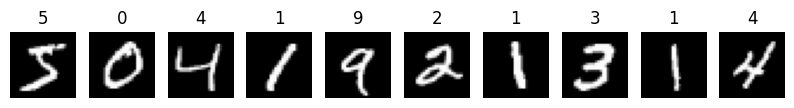

In [12]:
plt.figure(figsize=(10,2))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(xtrain[i],cmap='gray')
  plt.title(ytrain[i])
  plt.axis('off')
plt.show()

Model training

In [13]:
model = Sequential([Flatten(input_shape=(28,28)),
                    Dense(128,activation='relu'),
                    Dense(10,activation='softmax')
              ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(xtrain,ytrain,epochs=5,batch_size=32,validation_split=0.1,verbose=1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8689 - loss: 0.4569 - val_accuracy: 0.9640 - val_loss: 0.1226
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9614 - loss: 0.1276 - val_accuracy: 0.9717 - val_loss: 0.0959
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9766 - loss: 0.0822 - val_accuracy: 0.9755 - val_loss: 0.0864
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9826 - loss: 0.0591 - val_accuracy: 0.9790 - val_loss: 0.0749
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9862 - loss: 0.0462 - val_accuracy: 0.9772 - val_loss: 0.0839


In [16]:
ypred = model.predict(xtest)
ypred_classes = np.argmax(ypred,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


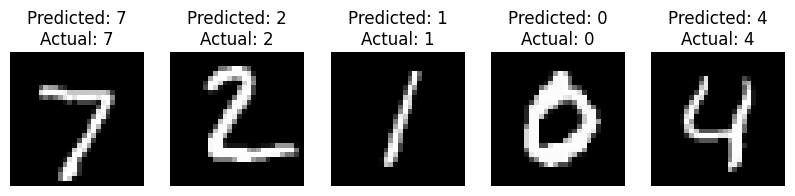

In [18]:
correct = np.where(ypred_classes==ytest)[0]
plt.figure(figsize=(10,4))
for i,correct in enumerate(correct[:5]):
    plt.subplot(1,5,i+1)
    plt.imshow(xtest[correct].reshape(28,28),cmap='gray')
    plt.title(f"Predicted: {ypred_classes[correct]}\nActual: {ytest[correct]}")
    plt.axis('off')
plt.show()

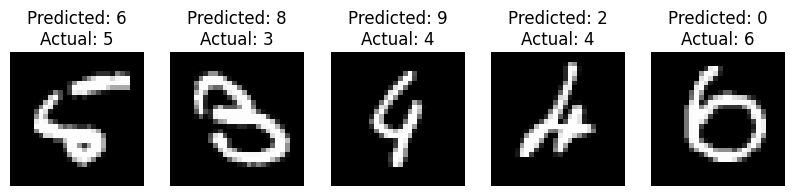

In [19]:
incorrect = np.where(ypred_classes!=ytest)[0]
plt.figure(figsize=(10,4))
for i,incorrect in enumerate(incorrect[:5]):
    plt.subplot(1,5,i+1)
    plt.imshow(xtest[incorrect].reshape(28,28),cmap='gray')
    plt.title(f"Predicted: {ypred_classes[incorrect]}\nActual: {ytest[incorrect]}")
    plt.axis('off')
plt.show()

LSTM

In [4]:
import torch
import torch.nn as nn

main logic

In [5]:
lstm = nn.LSTM(input_size=10,hidden_size=20,num_layers=1,batch_first=True)

In [8]:
X = torch.randn(5,7,10)
output,(hn,cn) = lstm(X)

print(output.shape)
print(hn.shape)
print(cn.shape)

torch.Size([5, 7, 20])
torch.Size([1, 5, 20])
torch.Size([1, 5, 20])


RNN

Add Libraries

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

Create Sequence Dataset

In [21]:
# create dummy sequence data
samples = 1000
timesteps = 20
features = 1

X = np.random.rand(samples, timesteps, features)

# binary labels: sum > 10 → class 1
y = (np.sum(X, axis=1) > 10).astype(int)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (1000, 20, 1)
Shape of y: (1000, 1)


Build RNN Model

In [22]:
model = Sequential([

    SimpleRNN(64, input_shape=(timesteps, features), activation='tanh'),

    Dense(32, activation='relu'),

    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compile Model

In [24]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


Train Model

In [25]:
history = model.fit(
    X,
    y,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5139 - loss: 0.6903 - val_accuracy: 0.5400 - val_loss: 0.6745
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5110 - loss: 0.6896 - val_accuracy: 0.6200 - val_loss: 0.6638
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6534 - loss: 0.6353 - val_accuracy: 0.7200 - val_loss: 0.4983
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6857 - loss: 0.5661 - val_accuracy: 0.7200 - val_loss: 0.5856
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7693 - loss: 0.5381 - val_accuracy: 0.6800 - val_loss: 0.6155
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7598 - loss: 0.4883 - val_accuracy: 0.8900 - val_loss: 0.2834
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8202 - loss: 0.4003 - val_accuracy: 0.8900 - val_loss: 0.2741
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8694 - loss: 0.3091 - val_accuracy: 0.7600 - val_loss

PREDICTIONS

In [26]:
pred = model.predict(X)

pred_classes = (pred > 0.5).astype(int)

print(pred_classes[:10])


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]]


TESTING

In [28]:
test_sequence = np.random.rand(1, timesteps, features)

prediction = model.predict(test_sequence)

print("Prediction:", prediction)
print("Class:", (prediction > 0.5).astype(int))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Prediction: [[0.9660566]]
Class: [[1]]


PLOT TRAINING ACCURACY

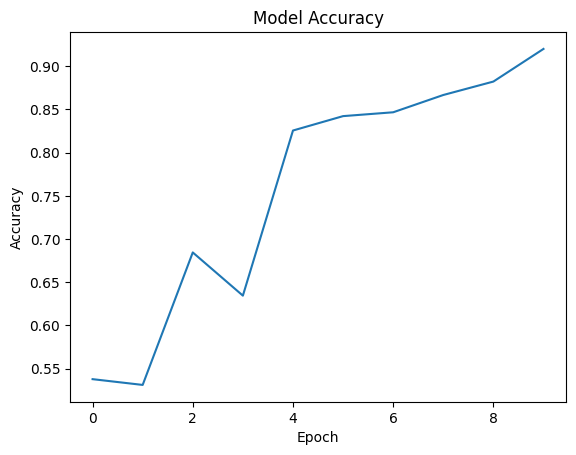

In [30]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

PLOT TRAINING LOSS

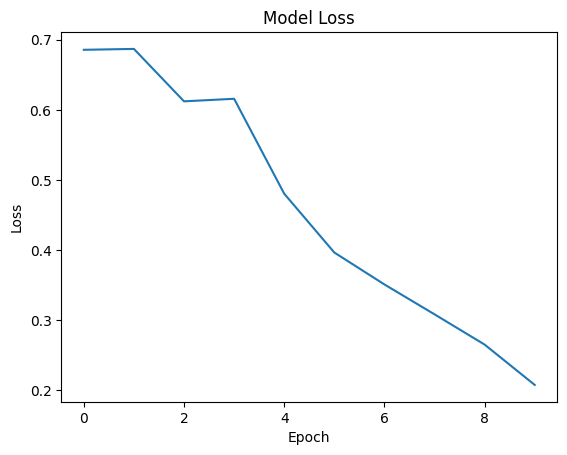

In [29]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()